In [15]:
import Pkg; Pkg.activate(@__DIR__)

  Activating project at `~/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/spectral_bose_hubbard`


In [17]:
using BoseHubbardQuantum
using Plots

# when module builds then use below
#using SpectralStatistics

using Polynomials
using SpecialFunctions
includet("../../src/base/base.jl")
includet("../../src/statistics/statistics.jl")
includet("../../src/models/models.jl")

In [18]:
L = 10
N = 5
basis = LtrAscBasis(L, N);
length(basis) # Hilbert space dimensions

2002

In [19]:
bhh = BoseHubbardHamiltonian(chain_graph(L), basis);

In [32]:
# spmatrix(bhh, J, U)
# where J are the hopping terms (L-1 in total)
# U are the on-site interactions (L in total)
H = spmatrix(bhh, vcat([1.5], ones(L-2)), 1.5 .* ones(L))

2002×2002 SparseMatrixCSC{Float64, Int64} with 14620 stored entries:
⢻⣶⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠻⣿⣿⣆⢢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠨⣙⠻⣦⣉⠦⠀⢤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠣⡜⢿⣷⣦⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⣄⠈⠛⠻⣦⡀⠀⠙⠆⠀⠠⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠳⣄⠀⠈⢿⣷⣦⢀⠀⠀⠈⠳⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠳⠄⠈⢛⡻⢎⡳⠄⠀⠀⠈⠣⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠙⠎⢻⣶⡀⠀⠀⠀⠈⠲⡄⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢦⡀⠀⠀⠀⠈⢻⣶⣤⡀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠦⡀⠀⠀⠀⠻⠿⣧⡳⣄⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢢⡀⠀⠀⠙⢮⡻⣮⡝⢦⡀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠳⣍⠻⣦⣉⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠀⠀⠀⠀⠈⠃⠘⠿⣧⡀⠀⠀⠀⠀⠀⠀⠈⠳⡄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠻⡿⣯⡳⡄⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠙⠮⢻⣶⡙⢦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠈⠳⣌⠻⣦⣍⠙⢦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠦⠀⠀⠀⠀⠀⠈⣇⠙⠿⣧⡀⠙⠦⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠈⢻⣶⣄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠃⠀⠙⢿⣷

In [33]:
evs = eigvals!(Array(H))

2002-element Vector{Float64}:
 -4.093181416600283
 -3.857670079740762
 -3.661165097767356
 -3.581676709501321
 -3.506582279269013
 -3.3993090508285624
 -3.383687529352025
 -3.3097878565345127
 -3.27780680572237
 -3.227437437939596
  ⋮
 15.416865009777434
 15.417391350797454
 15.418299555511808
 15.419426205759518
 15.420551119741376
 15.421451769288957
 15.422091440571158
 15.474530650550973
 15.67916428837871

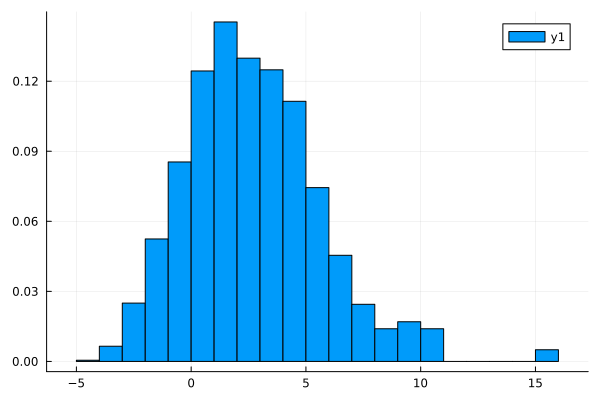

In [34]:
histogram(evs;
    normalize=:pdf,
)

In [35]:
evs_unf = unfold(RealSpectrum(evs), 10) # is not sorted anymore

UnfoldedSpectrum([-3.499536432073678, -4.6811406799547415, -1.6767099300439323, 0.15689660881742637, 2.1113048989845105, 5.1822712666409885, 5.651228097021282, 7.929695830897192, 8.942775901053718, 10.566838561072505  …  2013.953260279427, 1992.2976189835915, 1992.2835523536367, 1992.2598548234162, 1992.2314703336062, 1992.204251223034, 1992.1832683188534, 1992.1688037687206, 1992.2709641645574, 2021.896272492229])

In [36]:
issorted(evs_unf.data)

false

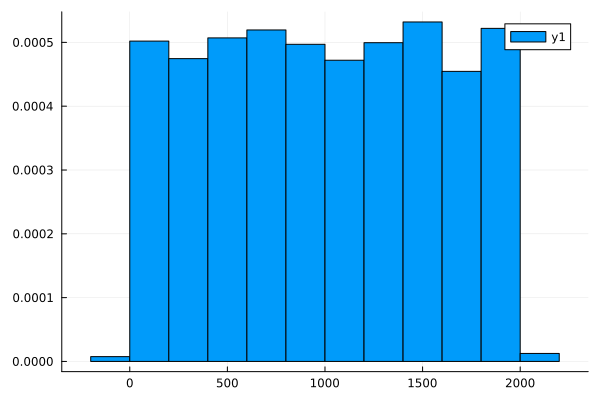

In [37]:
histogram(evs_unf.data;
    normalize=:pdf,
)

How to plot estimated level density by `unfold`??

In [38]:
level_spacing(evs_unf) # has negative values

2001-element Vector{Float64}:
  -1.1816042478810633
   3.004430749910809
   1.8336065388613587
   1.954408290167084
   3.070966367656478
   0.4689568303802938
   2.2784677338759094
   1.0130800701565263
   1.6240626600187866
   2.890771091146574
   ⋮
 -21.655641295835494
  -0.014066629954868404
  -0.02369753022048826
  -0.028384489809923252
  -0.027219110572332283
  -0.02098290418052784
  -0.01446455013274317
   0.10216039583679049
  29.62530832767152

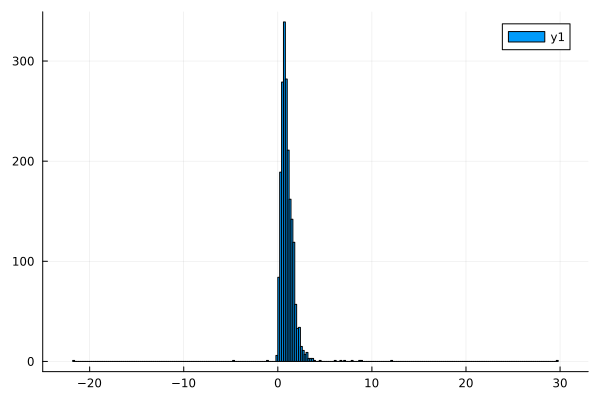

In [39]:
histogram(level_spacing(evs_unf)) # shows negative eigenvalues

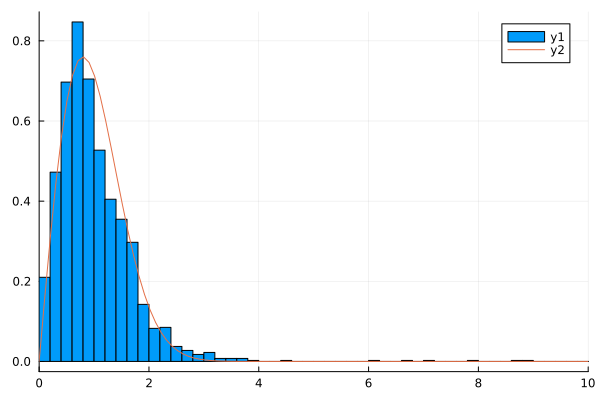

In [40]:
histogram(level_spacing(evs_unf);
    xlims=(0,10),
    normalize=:pdf,
)
xs = range(0,10;length=100)
plot!(xs, (x->level_spacing_pdf(GOE(), x)).(xs)) # not very convenient, better level_spacing_pdf.(GOE(), xs)) ??